## Mineração de dados - Semana 4: 

### Exercício sobre classificação supervisionada

Neste exercício, iremos fazer uma tarefa de classificação supervisionada usando árvores de decisão. 

### Construindo um modelo de classificação

#### Decisão de ir ou não a shows de comédia 

1. Crie um novo notebook e inclua uma descrição para ele. 

2. Nesta atividade, além da bibliotecas **pandas**, vamos importar as bibliotecas **sklearn** (scikit learn), para usar a árvore de decisão, e a **matplotlib**, para gerar gráficos. Vamos usar também a biblioteca **google.colab**, para fazer o upload de arquivos locais, assim como as funções **train_test_split** e **accuracy_score** para avaliar o desempenho de classificação.

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

3. Carregue o arquivo "shows.csv", obtido no repositório [Kaggle](https://www.kaggle.com/mruanova/decision-tree-for-comedy-shows-w3schools/data), usando o **files** e o selecione do seu computador.

In [ ]:
uploaded = files.upload()

Saving shows.csv to shows.csv


In [ ]:
comediantes = pd.read_csv('shows.csv',sep=',')
comediantes.head(5)

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES


4. Para usar Árvores de Decisão, todos os dados devem ser numéricos. Vamos transformar os campos de texto em categorias numéricas usando a função **map()**.

In [ ]:
comediantes['Nationality'] = comediantes['Nationality'].map({'UK':0, 'USA':1, 'N':2})
comediantes['Go'] = comediantes['Go'].map({'YES':1, 'NO':0})
comediantes.head()

,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,0
1,42,12,4,1,0
2,23,4,6,2,0
3,52,4,4,1,0
4,43,21,8,1,1


5. O atributo **Go** cotém o rótulo das classes. Nesse caso, ir ao show (**1 - sim**) ou não ir (**2 - não**). Vamos separar o conjunto de dados em dois: dados com as características e dados dos rótulos.

In [ ]:
atributos_nomes = ['Age','Experience','Rank','Nationality']
atributos = comediantes[atributos_nomes]
classes = comediantes['Go']

6. Agora, vamos construir a árvore de decisão.

In [ ]:
arvore = DecisionTreeClassifier()
arvore = arvore.fit(atributos,classes)

7. Vamos visualizar a árvore que foi gerada usando a função **plot_tree()**, que plota a imagem da árvore gerada com as informações de decisão.

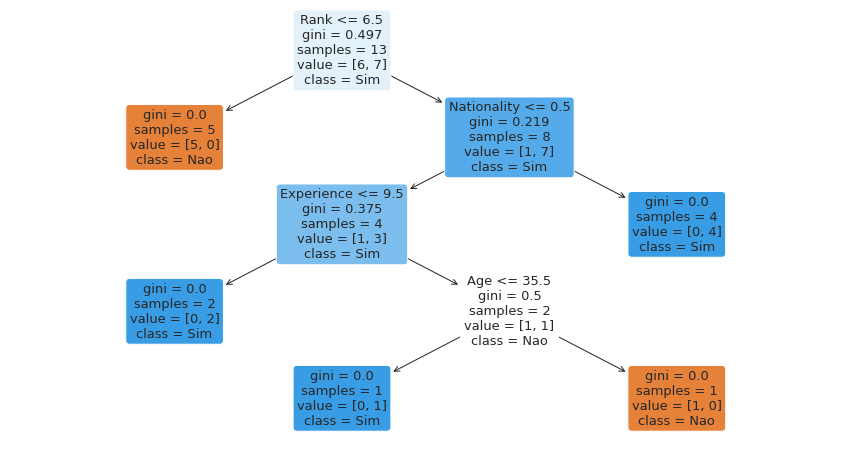

In [ ]:
plt.figure(figsize=(15,8))
plot_tree(arvore, filled=True, rounded=True, class_names=['Nao', 'Sim'], feature_names=atributos_nomes)
plt.show()

A árvore nos mostra como, a partir dos dados de treinamento de **comediantes**, as decisões serão tomadas.
Em cada nó, vemos as seguintes informações:
* O nome do atributo e o seu valor para verdadeiro ou falso
* gini: é o método usado para dividir as amostras. O valor varia entre 0.0 (todas as amostras com o mesmo resultado, então não há mais divisão) e 0.5 (o máximo de divisão, feita no meio da amostra).
* samples: é o número de amostras que atingiu aquele nó
* value: quantos objetos vão para os próximos ramos da árvore. Por exemplo, no nó raiz, 6 amostras vão para **não** e 7 vão para **sim** (gini = 0.497)

O nó da raiz também nos mostra o atributo mais importante para a classificação, nesse caso é o atributo **Rank**, ou nota do comediante. Quando esse valor é abaixo de 6,5, a classificação será **não**. A análise segue por outros atributos até atingir os nós folha.

8. Agora que o modelo de classificação foi construído, podemos fazer a predição de novos valores. Para isso, vamos usar a função **predict()** passando novos valores.

In [ ]:
print(arvore.predict([[40,10,7,1]]))

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


No caso acima, a classificação foi [1] - sim, ir ao show.

In [ ]:
print(arvore.predict([[80,30,4,0]]))

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


No caso acima, embora o comediante tenha bastante idade e experiência, **Rank** é menor que 6,5, então a classificação é [0] - não ir ao show.

## Avaliando acurácia da classificação
#### Qualidade de vinhos tintos

Vamos usar árvores de decisão para classificar uma base de dados sobre qualidade de vinhos. Em seguida, vamos avaliar o desempenho da classificação. Para isso, vamos dividir o conjunto de dados em treinamento e teste.

#### URL do conjunto de dados
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

Fonte: UCI Machine Learning Repository, Centro para Aprendizado de Máquina e Sistemas Inteligentes, Universidade da Califórnia, Irvine.

1. Importe a base de dados direto da URL e verifique as primeiras linhas. O arquivo contém 12 atributos (além da classe) e 4898 registros. Os atributos, numéricos, estão relacionados às características dos vinhos, tais como acidez, açucar, densidade, pH, álcool. O classificação é uma nota entre 0 e 10.

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
vinhos = pd.read_csv(url, sep=';')
vinhos.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


2. Separe os atributos das características das classes.

In [ ]:
vinhos_colunas = vinhos.columns[0:11].values.tolist()
vinhos_atributos = vinhos[vinhos_colunas]
vinhos_classes = vinhos['quality']

3. Agora vamos dividir os dados em conjuntos de treinamento e teste. Para isso, vamos usar a função **train_test_split()**, separando 10% dos dados para treinamento.

In [ ]:
atributos_treino, atributos_teste, vinho_classes_treino, vinho_classes_teste = train_test_split(vinhos_atributos, vinhos_classes, test_size=0.1, random_state=10)

4. Vamos construir a árvore de decisão

In [ ]:
vinheira = DecisionTreeClassifier()
vinheira = vinheira.fit(atributos_treino,vinho_classes_treino)

5. Vamos agora fazer a predição no conjunto de testes. O resultado da predição será usado para checar a acurácia do modelo.

In [ ]:
vinhos_classes_predicao = vinheira.predict(atributos_teste)
acuracia = accuracy_score(vinho_classes_teste, vinhos_classes_predicao)
print('Acurácia do classificador: {}'.format(acuracia))

Acurácia do classificador: 0.61875


A acurácia é de 61,87%, razoável apenas.

6. Agora vamos visualizar a árvore que foi gerada.

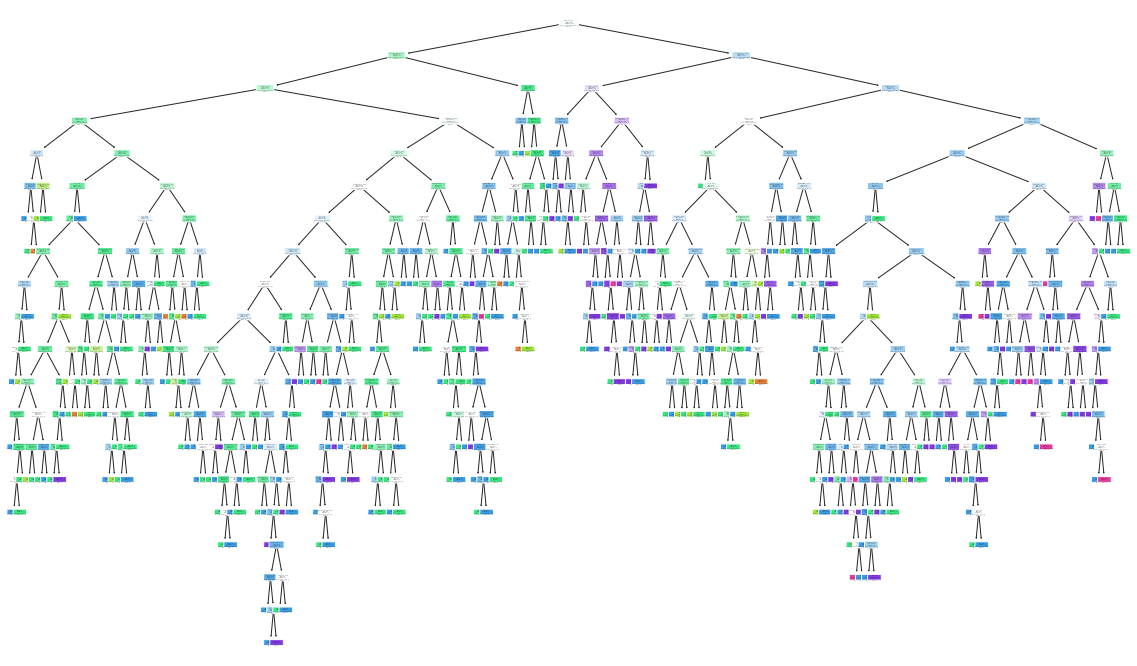

In [ ]:
plt.figure(figsize=(20,12))
plot_tree(vinheira, filled=True, rounded=True, class_names=['3','4','5','6','7','8'], feature_names=vinhos_colunas)
plt.show()

Com isso concluímos esse tutorial, você pode aprimorar seus conhecimentos analisando outras bases de dados do seu interesse.